In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('RONC_Prediction1A.csv')

In [ ]:
df

,74fic1001,74fi5401,74wi0902,Combined dT,Lab-RONC
0,121.552854,377.587306,528.585558,234.933619,102.1
1,88.003036,378.386453,517.633644,235.252003,103.1
2,90.013655,380.060215,522.220540,220.818818,101.4
3,117.276336,384.033291,533.524424,218.288892,102.0
4,96.414926,389.249584,519.463236,226.433851,100.9
...,...,...,...,...,...
230,124.032525,550.391608,531.318105,273.751476,101.8
231,132.494139,550.414160,531.476276,246.926226,101.4
232,123.786695,550.543345,532.393639,268.949898,102.1
233,120.472816,550.551586,533.011008,262.521636,102.3


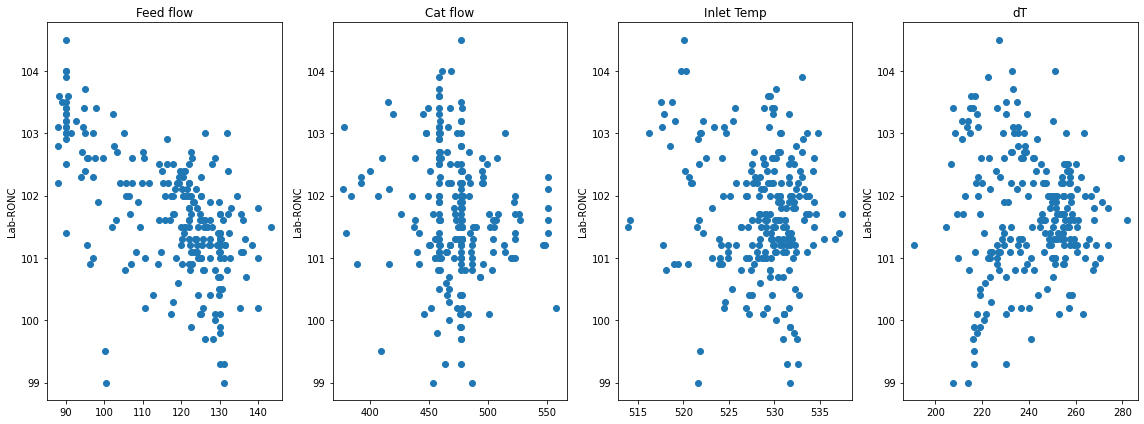

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize = (16,6))

axes[0].plot(df['74fic1001'],df['Lab-RONC'],'o')
axes[0].set_ylabel('Lab-RONC')
axes[0].set_title('Feed flow')

axes[1].plot(df['74fi5401'],df['Lab-RONC'],'o')
axes[1].set_ylabel('Lab-RONC')
axes[1].set_title('Cat flow')

axes[2].plot(df['74wi0902'],df['Lab-RONC'],'o')
axes[2].set_ylabel('Lab-RONC')
axes[2].set_title('Inlet Temp')

axes[3].plot(df['Combined dT'],df['Lab-RONC'],'o')
axes[3].set_ylabel('Lab-RONC')
axes[3].set_title('dT')

plt.tight_layout();

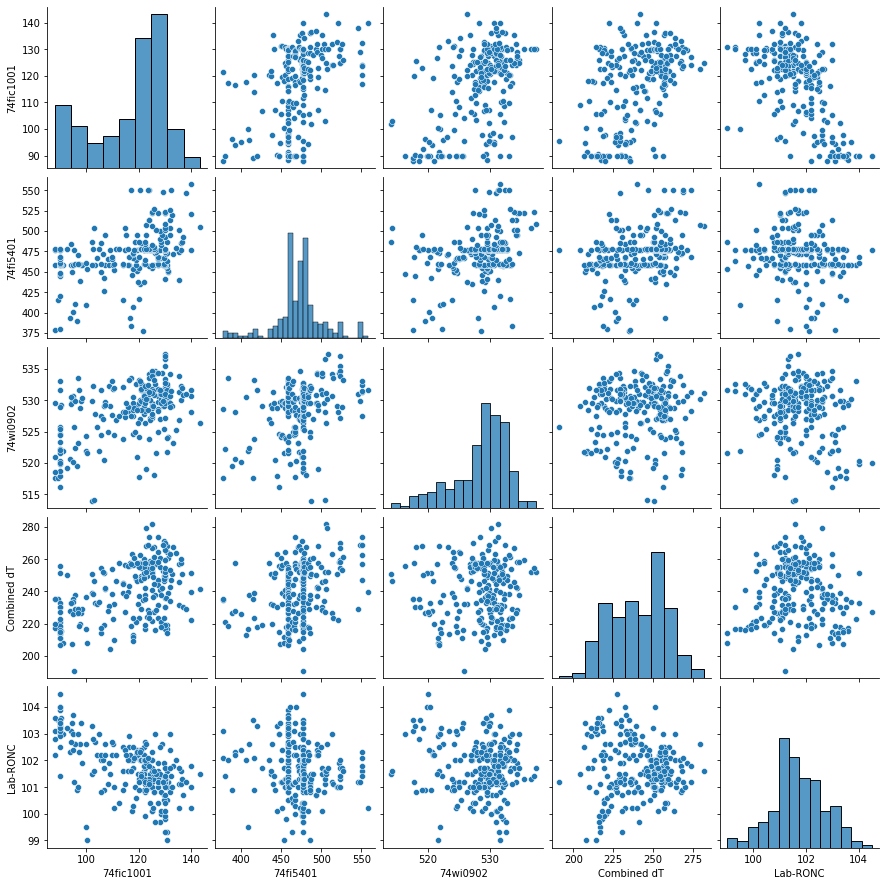

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.drop('Lab-RONC', axis=1)

In [ ]:
y = df['Lab-RONC']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
len(df)

235

In [ ]:
X_train

,74fic1001,74fi5401,74wi0902,Combined dT
85,122.614126,464.100801,530.946182,216.887179
224,125.013836,523.019946,533.857928,266.740442
172,120.992547,478.006777,529.903951,256.775797
170,115.804624,477.880169,528.979553,255.592894
108,130.820970,472.839987,521.705282,268.082783
...,...,...,...,...
63,90.003456,458.772556,521.748898,206.845873
70,127.392982,458.948599,531.817878,231.755173
81,110.679866,459.904924,532.047739,209.764753
11,89.126148,415.193996,517.546999,234.989247


In [ ]:
y_train

85     101.1
224    102.0
172    101.5
170    101.6
108    101.6
       ...  
63     102.5
70     101.3
81     101.0
11     103.5
95     100.3
Name: Lab-RONC, Length: 164, dtype: float64

In [ ]:
len(X_test)

71

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
#X_test.head()

In [ ]:
#y_test

In [ ]:
#test_predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df['Lab-RONC'].mean()

101.70340425531917

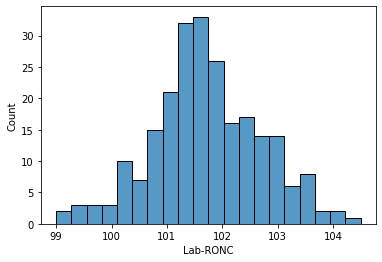

In [ ]:
sns.histplot(data = df, x = 'Lab-RONC', bins= 20)

In [ ]:
mean_absolute_error(y_test, test_predictions)

0.5339326539961776

In [ ]:
#RMSE ie. standard deviation
np.sqrt(mean_squared_error(y_test, test_predictions))

0.7429457015640349

In [ ]:
test_residuals = y_test - test_predictions

In [ ]:
test_residuals

90     0.223105
88     0.295382
4     -1.440051
104    0.776856
91    -0.105859
         ...   
202    0.992764
57     0.308731
194   -0.462678
169   -0.411708
16     0.183796
Name: Lab-RONC, Length: 71, dtype: float64

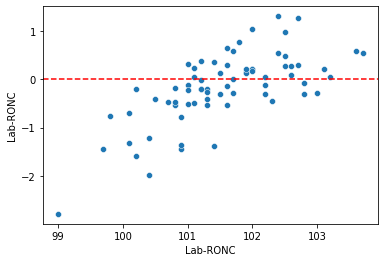

In [ ]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y=0, c='red',ls = '--')

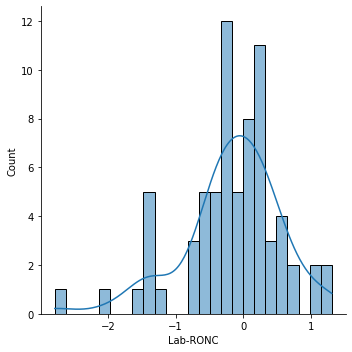

In [ ]:
sns.displot(test_residuals, bins = 25, kde=True)

In [ ]:
import scipy as sp

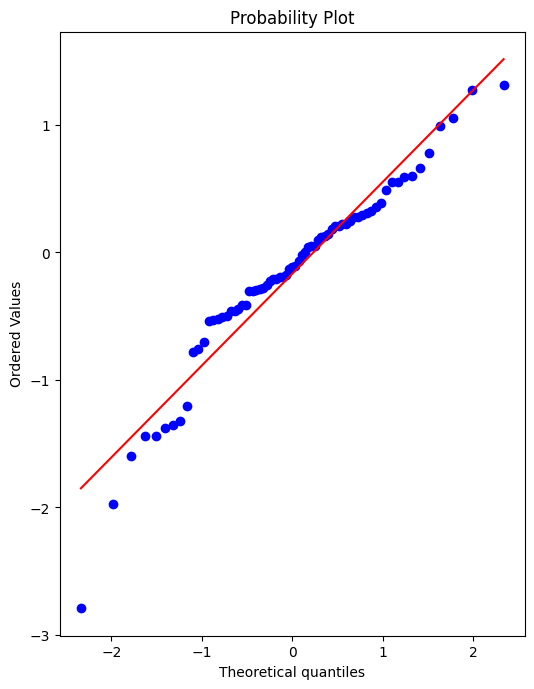

In [ ]:
fig, ax = plt.subplots(figsize=(6,8),dpi = 100)
_ =sp.stats.probplot(test_residuals, plot=ax)

***Deployment of the model***

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
final_model.coef_

array([-0.06812995,  0.00105692,  0.06949075,  0.02330891])

In [ ]:
final_model.intercept_

66.84599675853701

In [ ]:
X.head()

,74fic1001,74fi5401,74wi0902,Combined dT
0,121.552854,377.587306,528.585558,234.933619
1,88.003036,378.386453,517.633644,235.252003
2,90.013655,380.060215,522.220540,220.818818
3,117.276336,384.033291,533.524424,218.288892
4,96.414926,389.249584,519.463236,226.433851


In [ ]:
y_hat = final_model.predict(X)

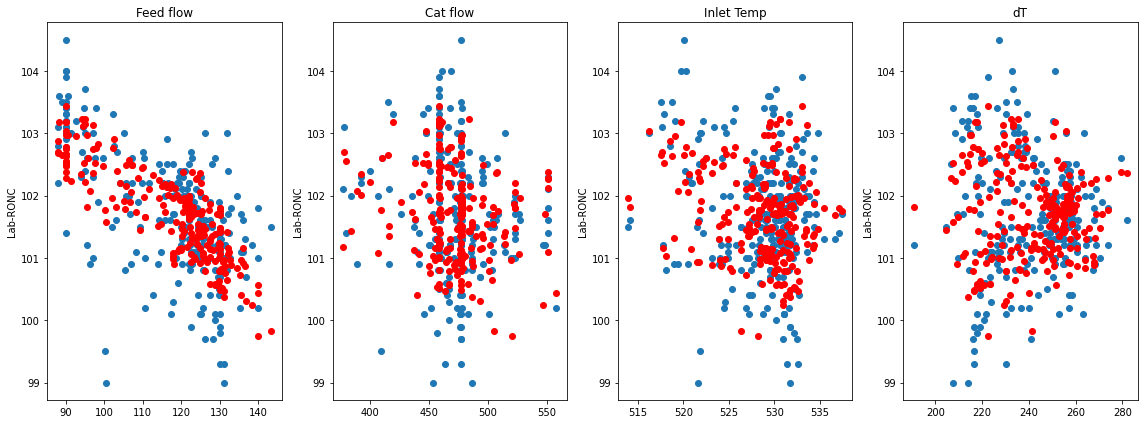

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize = (16,6))

axes[0].plot(df['74fic1001'],df['Lab-RONC'],'o')
axes[0].plot(df['74fic1001'],y_hat,'o',c = 'red')
axes[0].set_ylabel('Lab-RONC')
axes[0].set_title('Feed flow')

axes[1].plot(df['74fi5401'],df['Lab-RONC'],'o')
axes[1].plot(df['74fi5401'],y_hat,'o',c = 'red')
axes[1].set_ylabel('Lab-RONC')
axes[1].set_title('Cat flow')

axes[2].plot(df['74wi0902'],df['Lab-RONC'],'o')
axes[2].plot(df['74wi0902'],y_hat,'o',c = 'red')
axes[2].set_ylabel('Lab-RONC')
axes[2].set_title('Inlet Temp')

axes[3].plot(df['Combined dT'],df['Lab-RONC'],'o')
axes[3].plot(df['Combined dT'],y_hat,'o',c = 'red')
axes[3].set_ylabel('Lab-RONC')
axes[3].set_title('dT')

plt.tight_layout();

In [ ]:
from joblib import dump,load

In [ ]:
dump(final_model,'RONC_Prediction1.joblib')

['RONC_Prediction1.joblib']

In [ ]:
loaded_model = load('RONC_Prediction1.joblib')

In [ ]:
loaded_model.coef_

array([-0.06812995,  0.00105692,  0.06949075,  0.02330891])

In [ ]:
loaded_model.intercept_

66.84599675853701

In [ ]:
X.shape

(235, 4)

In [ ]:
#74fic1001 = 89.99763, 74fi5401 = 476.9051, 74wi0902 = 520.062, Combined dT = 227.1139
#RONC = ?
Predicted_RONC = [[89.99763,476.9051,520.062,227.1139]]

In [ ]:
loaded_model.predict(Predicted_RONC)

array([102.65178962])

In [ ]:
len(X_test)

71